In [1]:
from subprocess import Popen, PIPE
import getpass
username='EZAGAYNAYA'
REALM='BEE.VIMPELCOM.RU'
password = getpass.getpass(prompt='Enter Your Ldap password:\n')
kinit = 'kinit'
kinit_args = [ kinit, '%s@%s' % (username, REALM) ]
kinit = Popen(kinit_args, stdin=PIPE, stdout=PIPE, stderr=PIPE)
kinit.stdin.write(bytearray(password + "\n", "ascii"))
kinit.stdin.flush()
kinit.wait()

Enter Your Ldap password:
 ········


0

In [2]:
from pyspark import SparkConf  # noqa: E402
from pyspark.sql import DataFrame as SparkDataFrame  # noqa: E402
from pyspark.sql import SparkSession  # noqa: E402
from pyspark.sql import functions as F  # noqa: E402
from pyspark.sql.functions import col, when, min, max, sum, mean, count, substring, countDistinct, last_day, concat_ws 
from pyspark.sql.types import StringType, LongType

SPARK_SETTINGS = [
    ('spark.yarn.queue', 'default'),
        ('spark.sql.sources.partitionOverwriteMode', 'dynamic'),
        ('hive.exec.dynamic.partition', 'true'),
        ('hive.exec.dynamic.partition.mode', 'nonstrict'),
        ('spark.default.parallelism', '400'),
        ('spark.driver.memory', '20G'),
        ('spark.driver.memoryOverhead', '2G'),
        ('spark.driver.cores', 4),
        ('spark.driver.maxResultSize', '150G'),
        ('spark.dynamicAllocation.enabled', 'false'),
        ('spark.dynamicAllocation.maxExecutors', 200),
        ('spark.executor.memory', '20G'),
        ('spark.executor.memoryOverhead', '4G'),
        ('spark.executor.cores', 6),
        ('spark.executor.instances', 10),
        ('spark.hadoop.mapreduce.input.fileinputformat.input.dir.recursive', 'true'),
        ('spark.hive.mapred.supports.subdirectories', 'true'),# драйвер (понадобится для чтения из RDBMS)
        ('spark.kryoserializer.buffer', '1000m'),
        ('spark.kryoserializer.buffer.max', '2000m'),
        ('spark.rpc.message.maxSize', 2000),
        ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
        ('spark.sql.execution.arrow.pyspark.enabled', 'true'),
        ('spark.sql.shuffle.partitions', '400'),
        ('spark.driver.extraClassPath', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'), # драйвер (понадобится для чтения из RDBMS)
        ('spark.jars', '/lib/oracle/19.8/client64/lib/ojdbc8.jar'),
        ("spark.sql.hive.convertMetastoreOrc", " false"),
        ('spark.app.name', 'SVFomenkov_testing_pipeline')
]

app_name = 'ZEM_spark_session'

conf = SparkConf().setAppName(app_name).setMaster('yarn').setAll(SPARK_SETTINGS)
spark = SparkSession.builder.config(conf=conf).enableHiveSupport().getOrCreate()
spark.sparkContext.setLogLevel('ERROR')
spark.conf.set("spark.sql.hive.convertMetastoreOrc", " false")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/19 18:24:59 WARN Utils: Service 'sparkDriver' could not bind on port 32260. Attempting port 32261.
25/05/19 18:24:59 WARN Utils: Service 'SparkUI' could not bind on port 31662. Attempting port 31663.
25/05/19 18:25:01 WARN HiveConf: HiveConf of name hive.mapred.supports.subdirectories does not exist
25/05/19 18:25:03 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.
25/05/19 18:25:59 WARN Utils: Service 'org.apache.spark.network.netty.NettyBlockTransferService' could not bind on port 32390. Attempting port 32391.


In [3]:
from IPython.display import display, HTML
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
display(HTML("<style>div.jp-OutputArea-output pre {white-space: pre;}</style>"))

/tmp/ipykernel_2827/3383840084.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


25/05/19 18:26:11 ERROR YarnClientSchedulerBackend: YARN application has exited unexpectedly with state FAILED! Check the YARN application logs for more details.
25/05/19 18:26:11 ERROR YarnClientSchedulerBackend: Diagnostics message: Uncaught exception: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.deploy.yarn.ApplicationMaster.runExecutorLauncher(ApplicationMaster.scala:553)
	at org.apache.spark.deploy.yarn.ApplicationMaster.run(ApplicationMaster.scala:267)
	at org.apache.spark.deploy.yarn.ApplicationMaster$$anon$3.run(ApplicationMaster.scala:934)
	at org.apache.spark.deploy.yarn.Appl

#### df_external 2

In [5]:
# agg_b2b_cvm_client_profile_m_inn_b2bs
# org_kontur_focus_galaxy

df_external_2 = spark.read.table('b2b_profile.org_kontur_focus_galaxy')

print('num_rows:', df_external_2.count())  # 
print('num_cols:', len(df_external_2.columns))  # 
df_external_2.show(10)

num_rows: 6280540
num_cols: 47
+------------+---------------+--------------------+---------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------+---------------+-----------+-----------+-----------+---------+----------+------------+-----------+-----------+----+-------+-----+----------+-----------+----------------+----+--------------------+--------------------+----------+--------------------+----------------+--------------------+------------------+--------------------+-------------------+-------------+--------+-----------+------------+--------------+-------------------+-------------------+-------+------------+----------+---------------+----------+
|         inn|           ogrn|          legal_name|      kpp|    legal_name_short|     legal_name_full|                 opf|registration_date|       legal_address|region_type|    region_name|region_code|     status|bankrupting|dissolved|dissolving|reorganizing|status_date|      okato|

In [ ]:
df_null_counts = df_external_2.select([ sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df_external_2.columns ]).toPandas().T
df_external_shape_2 = df_external_2.count()

df_null_counts.rename(columns = {0: 'count_null'}, inplace = True)
df_null_counts['part_null'] = df_null_counts['count_null'] / df_external_shape
df_null_counts

In [ ]:
df_external_2 = df_external_2.select([col(c).alias(c.upper()) for c in df_external_2.columns])
df_external_2.show(3)

In [ ]:
df_external_2 = df_external_2.withColumnRenamed('INN', 'CLIENT_INN')

In [ ]:
common_columns = list(set(df_rep_client_info_pub.columns) & set(df_external_2.columns))
common_columns

#### Pandas

In [4]:
import pandas as pd
import numpy as np
import scipy as sp

import pickle
# import shap

import statsmodels
import statsmodels.api as sm

import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, datasets, linear_model, metrics

import seaborn as sns

import datetime as dt
from datetime import datetime
from datetime import date
import math

# TF-IDF:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

from matplotlib.collections import LineCollection

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['mean', 'sum', 'min', 'datetime', 'max']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
# df_external_2 = spark.read.table('b2b_profile.org_kontur_focus_galaxy')

# df_external_2_pd.to_pickle('df_external_2_pd.pkl')
df = pd.read_pickle('df_external_2_pd.pkl')

print(df.shape)
df.head(2)

# (6 293 630, 47)

(6293630, 47)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,MSP_IN_DATE,MSP_OUT_DATE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_DATE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,TIME_KEY
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",010001001,"ООО ""ОМНИТЕХ СОЛЮШНС""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМНИ...",Общества с ограниченной ответственностью,2024-06-06,"385141, Республика Адыгея (Адыгея), м.р-н Тахт...",республика,...,2024-07-10,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02
1,0100009649,1240100002482,Региональная Физкультурно-Спортивная Обществен...,010001001,"РФС ОО ""ФЛБ"" РА",РЕГИОНАЛЬНАЯ ФИЗКУЛЬТУРНО-СПОРТИВНАЯ ОБЩЕСТВЕН...,Общественные организации,2024-08-30,"385019, Республика Адыгея (Адыгея), г.о. Город...",республика,...,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02


In [6]:
# df.info()
df_null_count = pd.DataFrame(df.isnull().sum())
df_null_count.rename(columns = {0: 'count_null'}, inplace = True)
df_null_count['part_null'] = df_null_count['count_null'] / df.shape[0]
# df_null_count

In [7]:
# df.drop('')
col_to_drop = list(df_null_count[df_null_count['part_null'] == 1].index)
print(len(col_to_drop))
col_to_drop

1


['DISSOLVED']

In [8]:
print(df.shape)
df.drop(col_to_drop, axis = 1, inplace = True)
print(df.shape)

(6293630, 47)
(6293630, 46)


In [9]:
col_to_drop_2 = list(df_null_count[df_null_count['part_null'] > 0.99].index)
print(len(col_to_drop_2))
col_to_drop_2

5


['BANKRUPTING',
 'DISSOLVED',
 'REORGANIZING',
 'DISSOLUTION_DATE',
 'MSP_OUT_DATE']

In [10]:
print(df.shape) 
print('NA REVENUE:', df[df['REVENUE'].isna() == True].shape) 
print('Part NA REVENUE:', df[df['REVENUE'].isna() == True].shape[0] / df.shape[0]) 

print('> 0 REVENUE:', df[df['REVENUE'] > 0].shape) 
print('0 REVENUE:', df[df['REVENUE'] == 0].shape) 
print('< 0 REVENUE:', df[df['REVENUE'] < 0].shape) 

(6293630, 46)
NA REVENUE: (3932475, 46)
Part NA REVENUE: 0.6248341577118451
> 0 REVENUE: (1732001, 46)
0 REVENUE: (628743, 46)
< 0 REVENUE: (411, 46)


In [11]:
print(df.shape) 
print('NA REVENUE or COUNT_EMPLOYEE:', df[(df['REVENUE'].isna() == True) | 
                                          (df['COUNT_EMPLOYEE'].isnull() == True)].shape) 

print('Part NA REVENUE or COUNT_EMPLOYEE:', df[(df['REVENUE'].isna() == True) |
                                               (df['COUNT_EMPLOYEE'].isnull() == True)].shape[0] / df.shape[0]) 

print('> 0 REVENUE:', df[df['REVENUE'] > 0].shape) 
print('0 REVENUE:', df[df['REVENUE'] == 0].shape) 
print('< 0 REVENUE:', df[df['REVENUE'] < 0].shape) 

(6293630, 46)
NA REVENUE or COUNT_EMPLOYEE: (4270650, 46)
Part NA REVENUE or COUNT_EMPLOYEE: 0.6785670590740162
> 0 REVENUE: (1732001, 46)
0 REVENUE: (628743, 46)
< 0 REVENUE: (411, 46)


In [12]:
3932475 * 0.002

7864.95

In [13]:
df['REVENUE_YEAR'].value_counts()

2024.0    1009646
2023.0     712782
2018.0     238087
2022.0     114530
2021.0      95398
2020.0      67080
2019.0      52640
2017.0      31209
2016.0      17884
2015.0      11721
2014.0       5258
2013.0       4308
2012.0       1064
Name: REVENUE_YEAR, dtype: int64

In [14]:
df[df['REVENUE_YEAR'] == 2024]['REVENUE'].isnull().sum()

0

In [15]:
df.shape

(6293630, 46)

In [16]:
# df.iloc[:, 0:20].head(1).T

In [17]:
df['REVENUE_YEAR'].value_counts()

2024.0    1009646
2023.0     712782
2018.0     238087
2022.0     114530
2021.0      95398
2020.0      67080
2019.0      52640
2017.0      31209
2016.0      17884
2015.0      11721
2014.0       5258
2013.0       4308
2012.0       1064
Name: REVENUE_YEAR, dtype: int64

In [18]:
df[ (df['REVENUE'].isna() == True)  & 
         (df['COUNT_EMPLOYEE'].isnull() == True)].shape

(3747927, 46)

#### Data processing

In [19]:
# df = df[df['REVENUE_YEAR'] == 2024]

df = df[ (df['REVENUE'].isna() == True)  & 
         (df['COUNT_EMPLOYEE'].isnull() == True)]

print('df shape before sampling:', df.shape)
# df = df.sample(n = 1009646)
# df = df.sample(n = 826761)

# print('df shape after sampling:', df.shape)
df.head(2)

# (1 009 646, 46)

df shape before sampling: (3747927, 46)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,MSP_IN_DATE,MSP_OUT_DATE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_DATE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,TIME_KEY
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",010001001,"ООО ""ОМНИТЕХ СОЛЮШНС""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМНИ...",Общества с ограниченной ответственностью,2024-06-06,"385141, Республика Адыгея (Адыгея), м.р-н Тахт...",республика,...,2024-07-10,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02
1,0100009649,1240100002482,Региональная Физкультурно-Спортивная Обществен...,010001001,"РФС ОО ""ФЛБ"" РА",РЕГИОНАЛЬНАЯ ФИЗКУЛЬТУРНО-СПОРТИВНАЯ ОБЩЕСТВЕН...,Общественные организации,2024-08-30,"385019, Республика Адыгея (Адыгея), г.о. Город...",республика,...,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,2025-04-02


In [20]:
df['REVENUE_YEAR'].value_counts()

2019.0    44
Name: REVENUE_YEAR, dtype: int64

In [21]:
# df['OPF'].value_counts()

In [22]:
df_OPF = pd.DataFrame(df['OPF'].value_counts())
# df_OPF[df_OPF['OPF'] > 10]

In [23]:
l_ind = list(df_OPF.index)
# l_ind

In [24]:
[ i for i in l_ind if 'акцио' in i ]

['Непубличные акционерные общества',
 'Публичные акционерные общества',
 'Открытые акционерные общества']

In [25]:
# ************************* !!! ***********************************

df = df[df['OPF'].isin(['Общества с ограниченной ответственностью',
                        'Открытые акционерные общества',
                        'Публичные акционерные общества',
                        'Непубличные акционерные общества'])]

print(df.shape)
df['OPF'].value_counts()

(193721, 46)


Общества с ограниченной ответственностью    191169
Непубличные акционерные общества              2334
Публичные акционерные общества                 217
Открытые акционерные общества                    1
Name: OPF, dtype: int64

##### Dates

In [26]:
# from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [27]:
from datetime import datetime
datetime.now()

datetime.datetime(2025, 5, 19, 18, 28, 37, 49986)

In [28]:
df['MSP_IN_DATE'] = df['MSP_IN_DATE'].astype('datetime64')
df['MSP_OUT_DATE'] = df['MSP_OUT_DATE'].astype('datetime64')
df['STATUS_DATE'] = df['STATUS_DATE'].astype('datetime64')
df['COUNT_EMPLOYEE_DATE'] = df['COUNT_EMPLOYEE_DATE'].astype('datetime64')

In [29]:
df['MSP_IN_DATE_dist'] = df['MSP_IN_DATE'].apply(lambda x: diff_month(datetime.now(), x))
df['MSP_OUT_DATE_dist'] = df['MSP_OUT_DATE'].apply(lambda x: diff_month(datetime.now(), x))
df['STATUS_DATE_dist'] = df['STATUS_DATE'].apply(lambda x: diff_month(datetime.now(), x))

df[['MSP_IN_DATE', 'MSP_IN_DATE_dist']].head(5)

,MSP_IN_DATE,MSP_IN_DATE_dist
0,2024-07-10,10.0
2,2025-03-10,2.0
361,2024-08-10,9.0
464,2024-04-10,13.0
465,2024-04-10,13.0


#### Objects

In [30]:
print(df.select_dtypes(include = ['object']).shape)
df.select_dtypes(include = ['object']).head(2)

# (52 280, 34)

(193721, 34)


,CLIENT_INN,OGRN,LEGAL_NAME,KPP,LEGAL_NAME_SHORT,LEGAL_NAME_FULL,OPF,REGISTRATION_DATE,LEGAL_ADDRESS,REGION_TYPE,...,PRIVACY_FORM,OKVED_CODE,OKVED_TEXT,OKVED_CLASS_CODE,OKVED_CLASS_NAME,OKVED_CHAPTER_CODE,OKVED_CHAPTER_NAME,INDUSTRY_GROUP,MSP_TYPE,TIME_KEY
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",010001001,"ООО ""ОМНИТЕХ СОЛЮШНС""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМНИ...",Общества с ограниченной ответственностью,2024-06-06,"385141, Республика Адыгея (Адыгея), м.р-н Тахт...",республика,...,Частная собственность,22.29,Производство прочих пластмассовых изделий,22,Производство резиновых и пластмассовых изделий,C,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Производство,micro,2025-04-02
2,0100011461,1250100000480,"ООО ""Перспектива""",010001001,"ООО ""ПЕРСПЕКТИВА""","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПЕРС...",Общества с ограниченной ответственностью,2025-02-20,"385000, Республика Адыгея (Адыгея), г.о. Город...",республика,...,Частная собственность,10.51,Производство молока (кроме сырого) и молочной ...,10,Производство пищевых продуктов,C,ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА,Производство,micro,2025-04-02


#### X

In [31]:
# X = df.drop(['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 
X = df.drop(['LEGAL_NAME_SHORT', 'LEGAL_NAME_FULL', 
             'REGISTRATION_DATE','LEGAL_ADDRESS', 'HEADS',
             'OKVED_CODE', 'OKVED_TEXT', 'REGION_NAME',
             'DISSOLVING', 'DISSOLUTION_DATE', 
             'COUNT_EMPLOYEE_DATE', 
             'OKVED_CHAPTER_NAME', 'OKVED_CLASS_NAME',
             'STATUS_DATE', 'MSP_IN_DATE', 'MSP_OUT_DATE',
             'KPP', 'OKATO', 'OKFS', 'OKOGU', 'OKOPF', 'OKPO', 'OKTMO',
             'TIME_KEY'], axis = 1).reset_index()

X.drop('index', axis = 1, inplace = True)

print(X.index)
print(X.shape)
X.head(2)

RangeIndex(start=0, stop=193721, step=1)
(193721, 25)


,CLIENT_INN,OGRN,LEGAL_NAME,OPF,REGION_TYPE,REGION_CODE,STATUS,BANKRUPTING,REORGANIZING,AGE,...,MSP_TYPE,COUNT_EMPLOYEE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,NET_PROFIT_YEAR,MSP_IN_DATE_dist,MSP_OUT_DATE_dist,STATUS_DATE_dist
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,0.8,...,micro,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
1,0100011461,1250100000480,"ООО ""Перспектива""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,0.1,...,micro,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [32]:
X['REVENUE'].isna().sum()

193721

In [33]:
print(X.shape)
print(X.select_dtypes(include = ['float64']).shape)
print(X.select_dtypes(include = ['datetime64']).shape)
print(X.select_dtypes(include = ['object']).shape)
X.select_dtypes(include = ['object']).head(2)

(193721, 25)
(193721, 11)
(193721, 0)
(193721, 14)


,CLIENT_INN,OGRN,LEGAL_NAME,OPF,REGION_TYPE,REGION_CODE,STATUS,BANKRUPTING,REORGANIZING,PRIVACY_FORM,OKVED_CLASS_CODE,OKVED_CHAPTER_CODE,INDUSTRY_GROUP,MSP_TYPE
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,Частная собственность,22,C,Производство,micro
1,0100011461,1250100000480,"ООО ""Перспектива""",Общества с ограниченной ответственностью,республика,01,Действующее,None,None,Частная собственность,10,C,Производство,micro


In [34]:
# X.info()

In [35]:
df['MSP_TYPE'].value_counts()

micro     128302
small        151
middle        71
Name: MSP_TYPE, dtype: int64

In [36]:
X['REGION_TYPE'].value_counts()

область               82018
город                 54510
республика            36115
край                  19720
автономный округ       1146
автономная область      136
чувашия                  66
Name: REGION_TYPE, dtype: int64

In [37]:
categ_columns = ['REGION_TYPE', 'BANKRUPTING', 'REORGANIZING', 'MSP_TYPE', 'OKVED_CHAPTER_CODE']

for column in categ_columns: 
    
    dummies = pd.get_dummies(X[column], prefix = column)
    X[dummies.columns] = dummies
    X.drop([column], inplace = True, axis = 1)

In [38]:
print(X.shape)
X.head(2)

(193721, 53)


,CLIENT_INN,OGRN,LEGAL_NAME,OPF,REGION_CODE,STATUS,AGE,PRIVACY_FORM,OKVED_CLASS_CODE,INDUSTRY_GROUP,...,OKVED_CHAPTER_CODE_L,OKVED_CHAPTER_CODE_M,OKVED_CHAPTER_CODE_N,OKVED_CHAPTER_CODE_O,OKVED_CHAPTER_CODE_P,OKVED_CHAPTER_CODE_Q,OKVED_CHAPTER_CODE_R,OKVED_CHAPTER_CODE_S,OKVED_CHAPTER_CODE_T,OKVED_CHAPTER_CODE_U
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",Общества с ограниченной ответственностью,01,Действующее,0.8,Частная собственность,22,Производство,...,0,0,0,0,0,0,0,0,0,0
1,0100011461,1250100000480,"ООО ""Перспектива""",Общества с ограниченной ответственностью,01,Действующее,0.1,Частная собственность,10,Производство,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print(X.select_dtypes(include = ['object']).shape)
X.select_dtypes(include = ['object']).head(2)

# (5256458, 6)

(193721, 9)


,CLIENT_INN,OGRN,LEGAL_NAME,OPF,REGION_CODE,STATUS,PRIVACY_FORM,OKVED_CLASS_CODE,INDUSTRY_GROUP
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",Общества с ограниченной ответственностью,01,Действующее,Частная собственность,22,Производство
1,0100011461,1250100000480,"ООО ""Перспектива""",Общества с ограниченной ответственностью,01,Действующее,Частная собственность,10,Производство


In [40]:
X.select_dtypes(include = ['object']).columns

Index(['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'OPF', 'REGION_CODE', 'STATUS',
       'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP'],
      dtype='object')

In [41]:
# ************************************ JOIN unknown INN: *************************************************

In [42]:
X['REVENUE'].isna().sum()

193721

In [43]:
X['OPF'].value_counts()

Общества с ограниченной ответственностью    191169
Непубличные акционерные общества              2334
Публичные акционерные общества                 217
Открытые акционерные общества                    1
Name: OPF, dtype: int64

In [44]:
features_corr_BE_L1 = ['MSP_TYPE_micro',
 'MSP_IN_DATE_dist',
 'STATEDCAPITAL',
 'MSP_TYPE_middle',
 'AGE',
 'OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CHAPTER_CODE_C',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'REGION_TYPE_область',
 'OKVED_CHAPTER_CODE_M',
 'OKVED_CHAPTER_CODE_A',
 'OKVED_CHAPTER_CODE_F',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'OKVED_CHAPTER_CODE_D',
 'OKVED_CHAPTER_CODE_B',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'OKVED_CHAPTER_CODE_S',
 'OKVED_CHAPTER_CODE_H',
 'REGION_TYPE_республика',
 'OKVED_CHAPTER_CODE_I',
 'REORGANIZING_True',
 'PRIVACY_FORM_собственность',
 'OKVED_CHAPTER_CODE_G',
 'STATUS_егрюл',
 'OKVED_CHAPTER_CODE_K',
 'REGION_CODE_50',
 'OKVED_CHAPTER_CODE_R',
 'STATUS_08',
 'OKVED_CHAPTER_CODE_E']

print(len(features_corr_BE_L1))
# ! 34

34


In [45]:
# import pickle

# *********************** read: *************************
with open('model_LA_galaxy_targ2024_v2.pkl', 'rb') as fid:
    
    clf_lgb = pickle.load(fid)

clf_lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [46]:
# Index(['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'OPF', 'REGION_CODE', 'STATUS',
#        'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP'],
#       dtype='object')

In [47]:
ch_c = ['OPF', 'REGION_CODE', 'STATUS', 'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP']

list_f = []
for i in features_corr_BE_L1:
    for j in ch_c:
        if j in i:
            list_f.append(i)
list_f

['OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'PRIVACY_FORM_собственность',
 'STATUS_егрюл',
 'REGION_CODE_50',
 'STATUS_08']

In [48]:
# ********************* read transformer: ********************

with open('TF_IDF_vectorizer_v2.pkl', 'rb') as fid:
    vectorizer = pickle.load(fid)

# vectorizer.get_params()

In [49]:
all_features = [
 # 'OGRN',
 # 'LEGAL_NAME',
 'OPF',
 'REGION_CODE',
 'STATUS',
 'PRIVACY_FORM',
 'OKVED_CLASS_CODE',
 'INDUSTRY_GROUP']

for i in range(len(all_features)):
# for i in range(3):
    
    feature = all_features[i]
    texts = X[feature].fillna('-1')
    
    # # Initialize TF-IDF model:
    # vectorizer = TfidfVectorizer(max_features = 5)
    
    # # Fit and transform:
    # tfidf_matrix = vectorizer.fit_transform(texts)

    tfidf_matrix = vectorizer.transform(texts)
    
    # Convert to DataFrame:
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    tfidf_df.columns = [feature + '_' + col for col in tfidf_df.columns ]

    X.drop(feature, axis = 1, inplace = True)
    X = pd.concat([X, tfidf_df], axis = 1)

print(X.shape)
X.head(3)

# (899 938, 85)
# (52 280, 76)

(193721, 77)


,CLIENT_INN,OGRN,LEGAL_NAME,AGE,STATEDCAPITAL,COUNT_EMPLOYEE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,...,OKVED_CLASS_CODE_деятельность,OKVED_CLASS_CODE_оптовая,OKVED_CLASS_CODE_производство,OKVED_CLASS_CODE_строительство,OKVED_CLASS_CODE_торговля,INDUSTRY_GROUP_деятельность,INDUSTRY_GROUP_оптовая,INDUSTRY_GROUP_производство,INDUSTRY_GROUP_строительство,INDUSTRY_GROUP_торговля
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",0.8,10000.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0100011461,1250100000480,"ООО ""Перспектива""",0.1,10000.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0264083507,1240200023139,"ООО ""Кемпинг-1""",0.7,10000.0,NaN,NaN,NaN,NaN,-214000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# X.info()

In [51]:
print(len(list(set(list_f) - set(X.columns))))
set(list_f) - set(X.columns)

12


{'OKVED_CLASS_CODE_41',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'OKVED_CLASS_CODE_68',
 'OPF_непубличные',
 'OPF_ограниченной',
 'PRIVACY_FORM_иностранных',
 'PRIVACY_FORM_собственность',
 'PRIVACY_FORM_частная',
 'REGION_CODE_50',
 'STATUS_08',
 'STATUS_егрюл'}

In [52]:
print(len(list_f))
list_f

13


['OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'PRIVACY_FORM_собственность',
 'STATUS_егрюл',
 'REGION_CODE_50',
 'STATUS_08']

In [53]:
set(list_f).intersection(set(X.columns))

{'INDUSTRY_GROUP_оптовая'}

In [54]:
ch_c = ['OPF', 'REGION_CODE', 'STATUS', 'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP']

list_f = []
for i in features_corr_BE_L1:
    for j in ch_c:
        if j in i:
            list_f.append(i)
list_f

['OPF_ограниченной',
 'OPF_непубличные',
 'OKVED_CLASS_CODE_68',
 'PRIVACY_FORM_частная',
 'OKVED_CLASS_CODE_43',
 'OKVED_CLASS_CODE_47',
 'PRIVACY_FORM_иностранных',
 'INDUSTRY_GROUP_оптовая',
 'OKVED_CLASS_CODE_41',
 'PRIVACY_FORM_собственность',
 'STATUS_егрюл',
 'REGION_CODE_50',
 'STATUS_08']

In [55]:
list(X.columns)

['CLIENT_INN',
 'OGRN',
 'LEGAL_NAME',
 'AGE',
 'STATEDCAPITAL',
 'COUNT_EMPLOYEE',
 'COUNT_EMPLOYEE_YEAR',
 'REVENUE',
 'REVENUE_YEAR',
 'NET_PROFIT',
 'NET_PROFIT_YEAR',
 'MSP_IN_DATE_dist',
 'MSP_OUT_DATE_dist',
 'STATUS_DATE_dist',
 'REGION_TYPE_автономная область',
 'REGION_TYPE_автономный округ',
 'REGION_TYPE_город',
 'REGION_TYPE_край',
 'REGION_TYPE_область',
 'REGION_TYPE_республика',
 'REGION_TYPE_чувашия',
 'BANKRUPTING_True',
 'REORGANIZING_True',
 'MSP_TYPE_micro',
 'MSP_TYPE_middle',
 'MSP_TYPE_small',
 'OKVED_CHAPTER_CODE_A',
 'OKVED_CHAPTER_CODE_B',
 'OKVED_CHAPTER_CODE_C',
 'OKVED_CHAPTER_CODE_D',
 'OKVED_CHAPTER_CODE_E',
 'OKVED_CHAPTER_CODE_F',
 'OKVED_CHAPTER_CODE_G',
 'OKVED_CHAPTER_CODE_H',
 'OKVED_CHAPTER_CODE_I',
 'OKVED_CHAPTER_CODE_J',
 'OKVED_CHAPTER_CODE_K',
 'OKVED_CHAPTER_CODE_L',
 'OKVED_CHAPTER_CODE_M',
 'OKVED_CHAPTER_CODE_N',
 'OKVED_CHAPTER_CODE_O',
 'OKVED_CHAPTER_CODE_P',
 'OKVED_CHAPTER_CODE_Q',
 'OKVED_CHAPTER_CODE_R',
 'OKVED_CHAPTER_CODE_S',
 '

In [56]:
X_columns = list(X.columns)

ch_c = ['OPF', 'REGION_CODE', 'STATUS', 'PRIVACY_FORM', 'OKVED_CLASS_CODE', 'INDUSTRY_GROUP']

for i in ch_c:
    for j in X_columns:
        if i in j:
            print(j)

OPF_деятельность
OPF_оптовая
OPF_производство
OPF_строительство
OPF_торговля
REGION_CODE_деятельность
REGION_CODE_оптовая
REGION_CODE_производство
REGION_CODE_строительство
REGION_CODE_торговля
STATUS_DATE_dist
STATUS_деятельность
STATUS_оптовая
STATUS_производство
STATUS_строительство
STATUS_торговля
PRIVACY_FORM_деятельность
PRIVACY_FORM_оптовая
PRIVACY_FORM_производство
PRIVACY_FORM_строительство
PRIVACY_FORM_торговля
OKVED_CLASS_CODE_деятельность
OKVED_CLASS_CODE_оптовая
OKVED_CLASS_CODE_производство
OKVED_CLASS_CODE_строительство
OKVED_CLASS_CODE_торговля
INDUSTRY_GROUP_деятельность
INDUSTRY_GROUP_оптовая
INDUSTRY_GROUP_производство
INDUSTRY_GROUP_строительство
INDUSTRY_GROUP_торговля


In [57]:
len(list_f)
# 13

13

In [58]:
# fill 0:
list_0_cols = list(set(list_f) - set(X.columns))
for i in list_0_cols:
    X[i] = 0

print(X.shape)
X.head(3)
# (52 280, 88)
# (42 705, 88)

(193721, 89)


,CLIENT_INN,OGRN,LEGAL_NAME,AGE,STATEDCAPITAL,COUNT_EMPLOYEE,COUNT_EMPLOYEE_YEAR,REVENUE,REVENUE_YEAR,NET_PROFIT,...,STATUS_08,PRIVACY_FORM_иностранных,OKVED_CLASS_CODE_43,PRIVACY_FORM_частная,OKVED_CLASS_CODE_47,OPF_непубличные,OKVED_CLASS_CODE_68,PRIVACY_FORM_собственность,OKVED_CLASS_CODE_41,REGION_CODE_50
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",0.8,10000.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0100011461,1250100000480,"ООО ""Перспектива""",0.1,10000.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0264083507,1240200023139,"ООО ""Кемпинг-1""",0.7,10000.0,NaN,NaN,NaN,NaN,-214000.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X = X[['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'REVENUE', 'COUNT_EMPLOYEE'] + features_corr_BE_L1]

print(X.shape)
X.head(2)

(193721, 39)


,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,AGE,...,OKVED_CHAPTER_CODE_I,REORGANIZING_True,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",NaN,NaN,1,10.0,10000.0,0,0.8,...,0,0,0,0,0,0,0,0,0,0
1,0100011461,1250100000480,"ООО ""Перспектива""",NaN,NaN,1,2.0,10000.0,0,0.1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193721 entries, 0 to 193720
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CLIENT_INN                  193721 non-null  object 
 1   OGRN                        193721 non-null  object 
 2   LEGAL_NAME                  193721 non-null  object 
 3   REVENUE                     0 non-null       float64
 4   COUNT_EMPLOYEE              0 non-null       float64
 5   MSP_TYPE_micro              193721 non-null  uint8  
 6   MSP_IN_DATE_dist            128524 non-null  float64
 7   STATEDCAPITAL               188944 non-null  float64
 8   MSP_TYPE_middle             193721 non-null  uint8  
 9   AGE                         193720 non-null  float64
 10  OPF_ограниченной            193721 non-null  int64  
 11  OPF_непубличные             193721 non-null  int64  
 12  OKVED_CHAPTER_CODE_C        193721 non-null  uint8  
 13  OKVED_CLASS_CO

In [61]:
# cat_vars = X.select_dtypes(include  = [object]).columns
# num_vars = X.select_dtypes(include = [np.number]).columns

# X[cat_vars] = X[cat_vars].fillna('_miss',axis = 1)
# X[num_vars] = X[num_vars].fillna(0, axis = 1)

num_vars = ['AGE', 'STATEDCAPITAL', 'MSP_IN_DATE_dist']
X[num_vars] = X[num_vars].fillna(0, axis = 1)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193721 entries, 0 to 193720
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CLIENT_INN                  193721 non-null  object 
 1   OGRN                        193721 non-null  object 
 2   LEGAL_NAME                  193721 non-null  object 
 3   REVENUE                     0 non-null       float64
 4   COUNT_EMPLOYEE              0 non-null       float64
 5   MSP_TYPE_micro              193721 non-null  uint8  
 6   MSP_IN_DATE_dist            193721 non-null  float64
 7   STATEDCAPITAL               193721 non-null  float64
 8   MSP_TYPE_middle             193721 non-null  uint8  
 9   AGE                         193721 non-null  float64
 10  OPF_ограниченной            193721 non-null  int64  
 11  OPF_непубличные             193721 non-null  int64  
 12  OKVED_CHAPTER_CODE_C        193721 non-null  uint8  
 13  OKVED_CLASS_CO

In [63]:
# X.drop(['REVENUE_YEAR_x', 'REVENUE_YEAR_y'], axis = 1, inplace = True)

In [64]:
X = X.merge(df[['CLIENT_INN', 'REVENUE_YEAR']], how = 'left', on = 'CLIENT_INN')

print(X.shape)
X.head(2)

(193721, 40)


,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,AGE,...,REORGANIZING_True,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E,REVENUE_YEAR
0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",NaN,NaN,1,10.0,10000.0,0,0.8,...,0,0,0,0,0,0,0,0,0,NaN
1,0100011461,1250100000480,"ООО ""Перспектива""",NaN,NaN,1,2.0,10000.0,0,0.1,...,0,0,0,0,0,0,0,0,0,NaN


In [65]:
X['REVENUE_YEAR'].value_counts()

2019.0    1
Name: REVENUE_YEAR, dtype: int64

In [66]:
len(features_corr_BE_L1)

34

In [67]:
X_samp = X[X['REVENUE_YEAR'] != 2024.0 ][features_corr_BE_L1]
y_samp = X[X['REVENUE_YEAR'] != 2024.0 ][['REVENUE', 'COUNT_EMPLOYEE']].apply(lambda x: 1 if (x['REVENUE'] >= 1500000000) |
                                                                           (x['COUNT_EMPLOYEE'] >= 100) else 0, axis = 1)

y_pred_samp = clf_lgb.predict_proba(X_samp)[:,1]
AUC_samp = metrics.roc_auc_score(y_samp, y_pred_samp)
Gini_samp = 2 * AUC_samp - 1
print('AUC_samp:', AUC_samp)
print('Gini_samp:', Gini_samp)

# AUC_samp: 0.9193370182599093
# Gini_samp: 0.8386740365198186

# X['REVENUE_YEAR'] != 2024.0:
# AUC_samp: 0.9177401303621096
# Gini_samp: 0.8354802607242191

AUC_samp: nan
Gini_samp: nan


/home/ezagaynaya/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [68]:
y_samp.value_counts()

0    193721
dtype: int64

In [69]:
X['REVENUE_YEAR'].value_counts()

2019.0    1
Name: REVENUE_YEAR, dtype: int64

In [70]:
X['REVENUE'].value_counts()

Series([], Name: REVENUE, dtype: int64)

In [71]:
X['COUNT_EMPLOYEE'].value_counts()

Series([], Name: COUNT_EMPLOYEE, dtype: int64)

#### X_samp (calc)

In [72]:
X_samp = X[features_corr_BE_L1]
y_samp = X[['REVENUE', 'COUNT_EMPLOYEE']].apply(lambda x: 1 if (x['REVENUE'] >= 1500000000) |
                                                                           (x['COUNT_EMPLOYEE'] >= 100) else 0, axis = 1)

y_pred_samp = clf_lgb.predict_proba(X_samp)[:,1]

In [73]:
print(X_samp.shape)
X_samp['y_pred_proba_samp'] = y_pred_samp
print(X_samp.shape)

(193721, 34)
(193721, 35)


/tmp/ipykernel_2827/68594985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_samp['y_pred_proba_samp'] = y_pred_samp


In [74]:
X_samp = X_samp.reset_index()

In [75]:
print(X.shape)
X = X.reset_index()
X

(193721, 40)


,index,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,...,REORGANIZING_True,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E,REVENUE_YEAR
0,0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",NaN,NaN,1,10.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,0100011461,1250100000480,"ООО ""Перспектива""",NaN,NaN,1,2.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2,0264083507,1240200023139,"ООО ""Кемпинг-1""",NaN,NaN,1,9.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,0269045329,1240200008190,"ООО ""Рдрстрой""",NaN,NaN,1,13.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,0269045368,1240200008905,"ООО ""Уммастрой""",NaN,NaN,1,13.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193716,193716,9728015249,1207700380469,"ООО ""Экотрейдинг""",NaN,NaN,0,0.0,10000.0,0,...,0,0,1,0,0,0,0,0,0,NaN
193717,193717,9728082968,1227700872398,"ООО ""Аэлита""",NaN,NaN,0,0.0,200000.0,0,...,0,0,0,0,0,0,0,0,0,NaN
193718,193718,9728094025,1237700296712,"ООО ""Лксхви""",NaN,NaN,0,0.0,10000.0,0,...,0,0,0,0,1,0,0,0,0,NaN
193719,193719,9731096872,1227700465288,"ООО ""Элемент""",NaN,NaN,1,32.0,10000.0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [76]:
print(X.shape)
X = X.merge(X_samp[['index', 'y_pred_proba_samp']], how = 'left', on = 'index')
print(X.shape)
X.head(2)

(193721, 41)
(193721, 42)


,index,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,...,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E,REVENUE_YEAR,y_pred_proba_samp
0,0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",NaN,NaN,1,10.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.002490
1,1,0100011461,1250100000480,"ООО ""Перспектива""",NaN,NaN,1,2.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.001456


In [77]:
X.shape

(193721, 42)

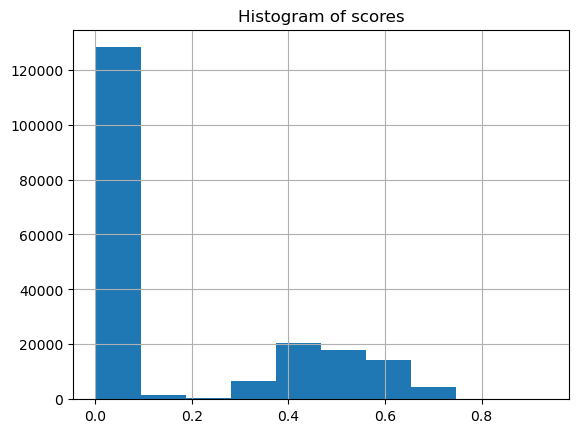

In [78]:
# X['y_pred_proba_samp'].hist()
plt.hist(X['y_pred_proba_samp'])
# plt.xlabel("Histogram of scores")
pylab.title('Histogram of scores')
plt.grid(True)

In [79]:
X['y_pred_proba_samp'].describe()

count    193721.000000
mean          0.172087
std           0.241341
min           0.000369
25%           0.002490
50%           0.005628
75%           0.431913
max           0.934274
Name: y_pred_proba_samp, dtype: float64

In [80]:
X[X['y_pred_proba_samp'] > 0.67].shape[0] / X.shape[0]
# 0.017286737037668684

0.01768006566144094

In [81]:
X.shape

(193721, 42)

In [82]:
X.iloc[:-10,:]

,index,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,...,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E,REVENUE_YEAR,y_pred_proba_samp
0,0,0100008758,1240100001580,"ООО ""Омнитех Солюшнс""",NaN,NaN,1,10.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.002490
1,1,0100011461,1250100000480,"ООО ""Перспектива""",NaN,NaN,1,2.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.001456
2,2,0264083507,1240200023139,"ООО ""Кемпинг-1""",NaN,NaN,1,9.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.002003
3,3,0269045329,1240200008190,"ООО ""Рдрстрой""",NaN,NaN,1,13.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.002697
4,4,0269045368,1240200008905,"ООО ""Уммастрой""",NaN,NaN,1,13.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.002697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193706,193706,9721196148,1237700050125,"ООО ""Партнер""",NaN,NaN,0,0.0,30000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.580134
193707,193707,9723164938,1227700501302,"ООО ""Союз""",NaN,NaN,0,0.0,30000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.448076
193708,193708,9723186579,1237700051819,"ООО ""Соната""",NaN,NaN,0,0.0,30000.0,0,...,0,1,0,0,0,0,0,0,NaN,0.446562
193709,193709,9724049737,1217700260690,"ООО ""Лисма""",NaN,NaN,0,0.0,10000.0,0,...,0,0,0,0,0,0,0,0,NaN,0.109384


In [83]:
8536/52280

0.16327467482785005

In [103]:
X1 = X[(X['y_pred_proba_samp'] >= 0.73 ) 
       # (X['y_pred_proba_samp'] >= 0.7 ) 
         ].sort_values(by = ['y_pred_proba_samp'], ascending = False)

print(X1.shape)
X1.head(35)

(1847, 42)


,index,CLIENT_INN,OGRN,LEGAL_NAME,REVENUE,COUNT_EMPLOYEE,MSP_TYPE_micro,MSP_IN_DATE_dist,STATEDCAPITAL,MSP_TYPE_middle,...,PRIVACY_FORM_собственность,OKVED_CHAPTER_CODE_G,STATUS_егрюл,OKVED_CHAPTER_CODE_K,REGION_CODE_50,OKVED_CHAPTER_CODE_R,STATUS_08,OKVED_CHAPTER_CODE_E,REVENUE_YEAR,y_pred_proba_samp
102225,102225,3525030681,1023500000655,"АО ""Банк ""Вологжанин""",NaN,NaN,0,10.0,2.451382e+07,1,...,0,0,0,1,0,0,0,0,NaN,0.934274
60715,60715,7707062854,1027739420565,"АО Страховая Компания ""Турикум""",NaN,NaN,0,10.0,6.034292e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.924269
153725,153725,6166003409,1026100002026,"Коммерческий Банк ""Сельмашбанк"" (ПАО)",NaN,NaN,0,10.0,1.361000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.918223
102644,102644,7725038220,1027739050833,"""Банк Глобус"" (АО)",NaN,NaN,0,10.0,4.500000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.917933
179135,179135,7706028882,1027739463300,"Акционерный Коммерческий Банк ""Тендер-Банк"" (АО)",NaN,NaN,0,10.0,3.050000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.916866
111327,111327,7722022528,1027739153573,Банк Развития и Модернизации Промышленности (АО),NaN,NaN,0,10.0,8.100000e+07,1,...,0,0,0,1,0,0,0,0,NaN,0.913019
34378,34378,7703008207,1027700128796,"Коммерческий Банк ""Новый Московский Банк"" (ООО)",NaN,NaN,0,10.0,2.370000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.912047
166442,166442,7703004072,1027739563610,"ООО Коммерческий банк ""СИНКО-БАНК""",NaN,NaN,0,10.0,3.560000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.912047
148087,148087,7449014065,1027400001727,"""Уральский Промышленный Банк"" (АО)",NaN,NaN,0,10.0,2.644724e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.905288
87096,87096,7710142732,1027739621810,"Коммерческий Банк ""Крокус-Банк"" (ООО)",NaN,NaN,0,10.0,3.000000e+08,1,...,0,0,0,1,0,0,0,0,NaN,0.905288


In [107]:
X1.iloc[:100,:][['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'y_pred_proba_samp']]
X1.iloc[:100,:][['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'y_pred_proba_samp']].to_excel('LA_top_100.xlsx')

In [85]:
X1.rename(columns = {'y_pred_proba_samp': 'model_score'}, inplace = True)
X1['model_score'] = X1['model_score'].round(4)
X1[['CLIENT_INN', 'LEGAL_NAME', 'model_score']].head(15)

,CLIENT_INN,LEGAL_NAME,model_score
102225,3525030681,"АО ""Банк ""Вологжанин""",0.9343
60715,7707062854,"АО Страховая Компания ""Турикум""",0.9243
153725,6166003409,"Коммерческий Банк ""Сельмашбанк"" (ПАО)",0.9182
102644,7725038220,"""Банк Глобус"" (АО)",0.9179
179135,7706028882,"Акционерный Коммерческий Банк ""Тендер-Банк"" (АО)",0.9169
111327,7722022528,Банк Развития и Модернизации Промышленности (АО),0.9130
34378,7703008207,"Коммерческий Банк ""Новый Московский Банк"" (ООО)",0.9120
166442,7703004072,"ООО Коммерческий банк ""СИНКО-БАНК""",0.9120
87096,7710142732,"Коммерческий Банк ""Крокус-Банк"" (ООО)",0.9053
148087,7449014065,"""Уральский Промышленный Банк"" (АО)",0.9053


In [86]:
# X1.to_excel('model_score_NAN.xlsx')

In [87]:
# X1[['CLIENT_INN', 'OGRN', 'LEGAL_NAME', 'model_score']].head(50)

In [88]:
def dependency_volume_threshold(y_pred_all):

    list_thresholds, list_number, list_part = [], [], []
    
    # for th_i in range(0, 10):
    # for th_i in range(1, 10):

        # th_i = th_i / 10
    
    for th_i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.67, 0.7, 0.8, 0.9]:
        
        number_i = y_pred_all[y_pred_all['model_score'] >= th_i].shape[0]
        part_i = y_pred_all[y_pred_all['model_score'] >= th_i].shape[0] / y_pred_all['model_score'].shape[0]
        # print(part_i, y_pred_all[y_pred_all['model_score'] >= th_i].shape[0], y_pred_all['model_score'].shape[0])
        
        list_thresholds.append(th_i)
        list_number.append(number_i)
        list_part.append(part_i)

    d = {'thresholds': list_thresholds, 'number': list_number, 'part %': list_part}
    df_th_num = pd.DataFrame(d)
    df_th_num['part %'] = df_th_num['part %'].apply(lambda x: '{:.2%}'.format(x))  

    return df_th_num

In [89]:
y_pred_all_df = pd.DataFrame(y_pred_samp)
y_pred_all_df.rename(columns = {0: 'model_score'}, inplace = True)
y_pred_all_df.sort_values(by = 'model_score', ascending = False)

,model_score
102225,0.934274
60715,0.924269
153725,0.918223
102644,0.917933
179135,0.916866
...,...
73702,0.000428
154564,0.000388
149665,0.000369
135225,0.000369


In [90]:
df_th_num = dependency_volume_threshold(y_pred_all_df)
df_th_num

,thresholds,number,part %
0,0.00,193721,100.00%
1,0.10,65406,33.76%
2,0.20,64130,33.10%
3,0.30,63282,32.67%
4,0.40,56208,29.01%
5,0.50,31663,16.34%
6,0.60,13698,7.07%
7,0.67,3425,1.77%
8,0.70,2273,1.17%
9,0.80,83,0.04%


In [91]:
list(df_th_num['thresholds'])

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.67, 0.7, 0.8, 0.9]

Text(0.5, 0, 'threshold')

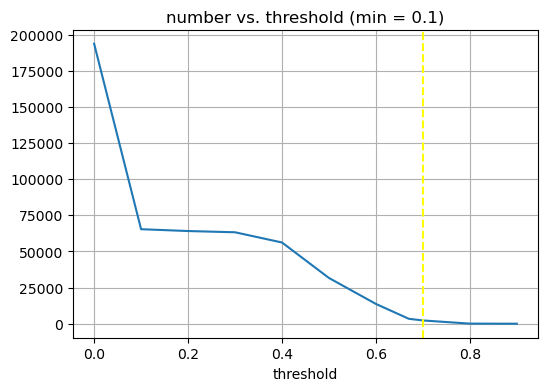

In [92]:
# df_th_num.plot()

plt.figure(figsize = (6, 4))

plt.plot(df_th_num['thresholds'], df_th_num['number'])
plt.axvline(x = 0.7, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold (min = 0.1)')
plt.xlabel("threshold")

Text(0.5, 0, 'threshold')

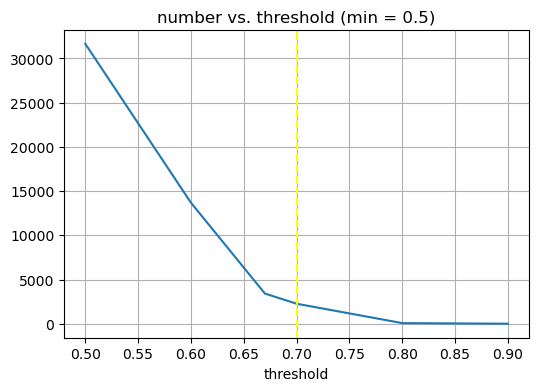

In [93]:
plt.figure(figsize = (6, 4))

plt.plot(df_th_num[df_th_num['thresholds'] >= 0.5]['thresholds'], 
         df_th_num[df_th_num['thresholds'] >= 0.5]['number'])

plt.axvline(x = 0.7, color = 'yellow', linestyle = '--')

plt.grid()
plt.title('number vs. threshold (min = 0.5)')
plt.xlabel("threshold")

In [94]:
# df_th_num.to_excel('df_th_num.xlsx')

In [95]:
print(X.shape)
print(X[X['y_pred_proba_samp'] < 0.1].shape)

(193721, 42)
(128315, 42)


In [96]:
42705 - 28203

14502

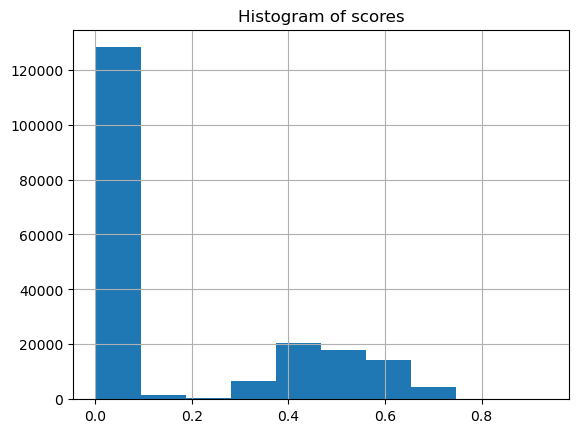

In [97]:
plt.hist(X['y_pred_proba_samp'])
pylab.title('Histogram of scores')
plt.grid(True)

In [98]:
X['y_pred_proba_samp'].sort_values(ascending = False)

102225    0.934274
60715     0.924269
153725    0.918223
102644    0.917933
179135    0.916866
            ...   
73702     0.000428
154564    0.000388
149665    0.000369
135225    0.000369
93564     0.000369
Name: y_pred_proba_samp, Length: 193721, dtype: float64